In [136]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from dotenv import dotenv_values,load_dotenv

In [90]:
ENV = dotenv_values(".env")
load_dotenv(override=False)

True

In [754]:
#Cargar el dataset
df = pd.read_csv(os.environ['DATASETS_PATH']+'/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [250]:
col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
#debe ser formato numpy array
X = df[col_names]
X = X.values
print(type(X))
#debe ser formato list
y = df.Outcome
y = y.values.tolist()
print(type(y))

<class 'numpy.ndarray'>
<class 'list'>


In [95]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [96]:
df_describe = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
df_describe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


 + mean = Media es el promedio de los datos
 + std = La desviación estándar mide la dispersión de una distribución de datos
 + 25% = El primer cuartil Q1, es el valor en el cual o por debajo del cual queda aproximadamente un cuarto (25%) de todos los valores de la sucesión (ordenada)
 + 50% = El segundo cuartil Q2 es el valor por debajo del cual queda el 50% de los datos (Mediana)
 + 75% =el tercer cuartil Q3 es el valor por debajo del cual quedan las tres cuartas partes (75%) de los datos.
 + MAX y Min : valores mayor y menor 



# Pregnancies [int]

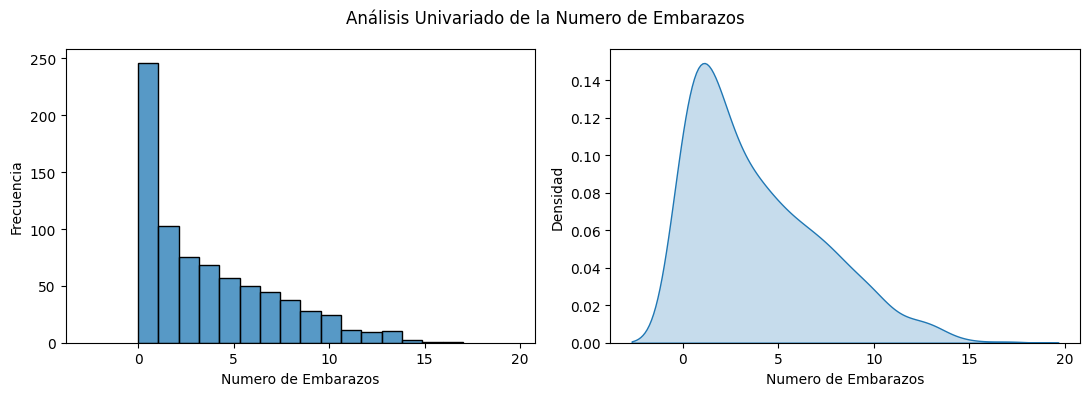

In [97]:
var = 'Pregnancies'
var_title = 'Numero de Embarazos'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Glucose [int]¶


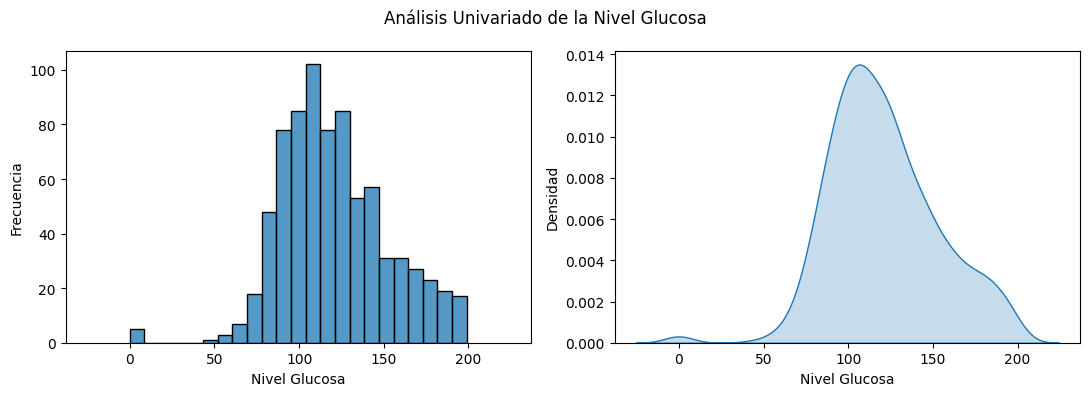

In [98]:
var = 'Glucose'
var_title = 'Nivel Glucosa'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# BloodPressure

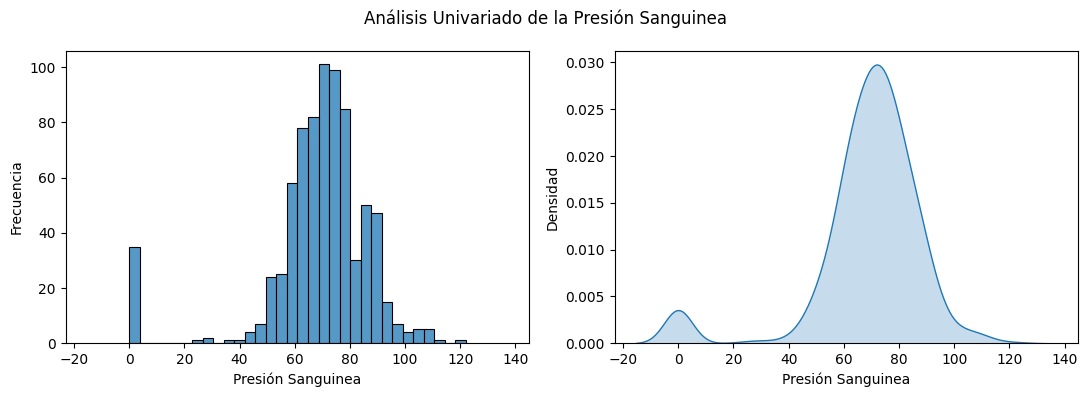

In [99]:
var = 'BloodPressure'
var_title = 'Presión Sanguinea'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# SkinThickness

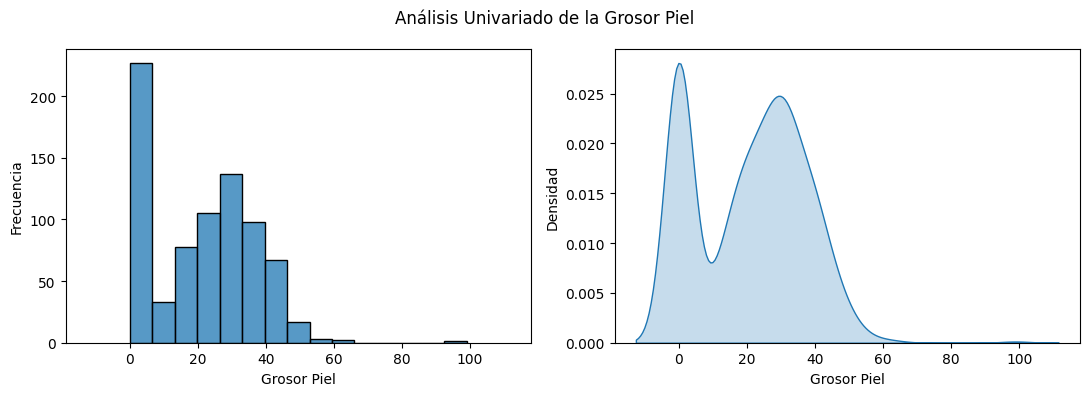

In [100]:
var = 'SkinThickness'
var_title = 'Grosor Piel'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Insulin

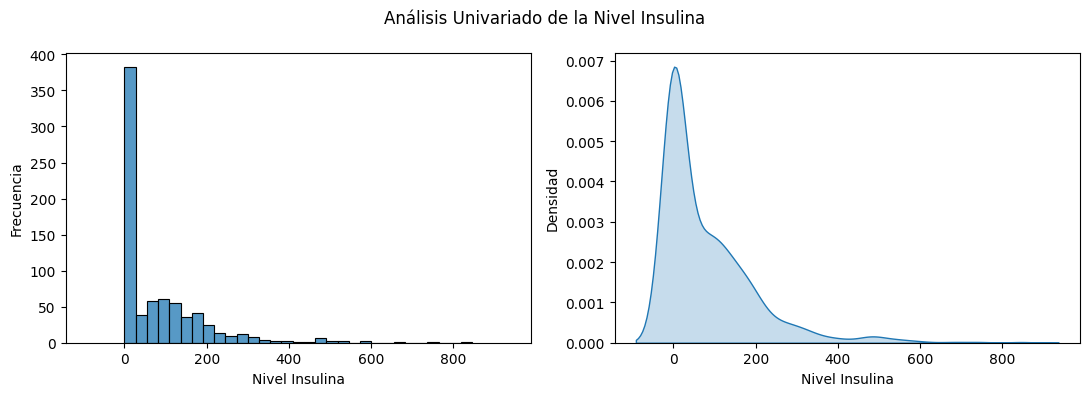

In [101]:
var = 'Insulin'
var_title = 'Nivel Insulina'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# BMI

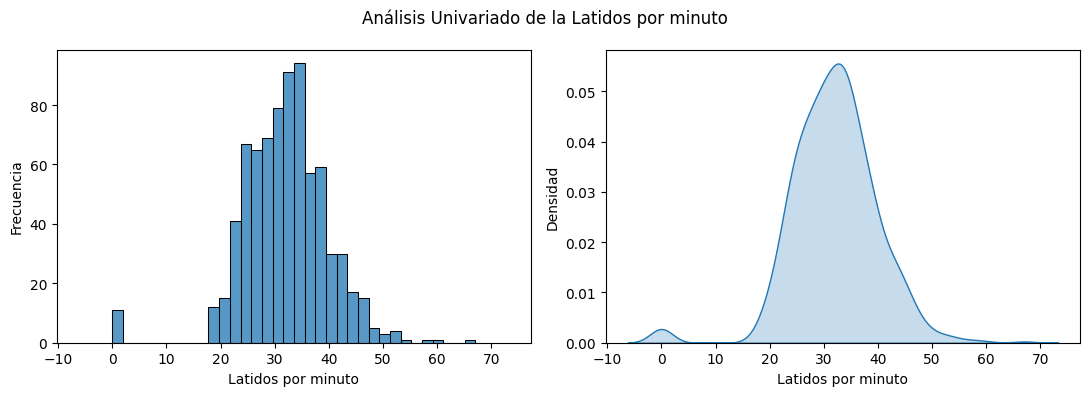

In [102]:
var = 'BMI'
var_title = 'Latidos por minuto'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# DiabetesPedigreeFunction

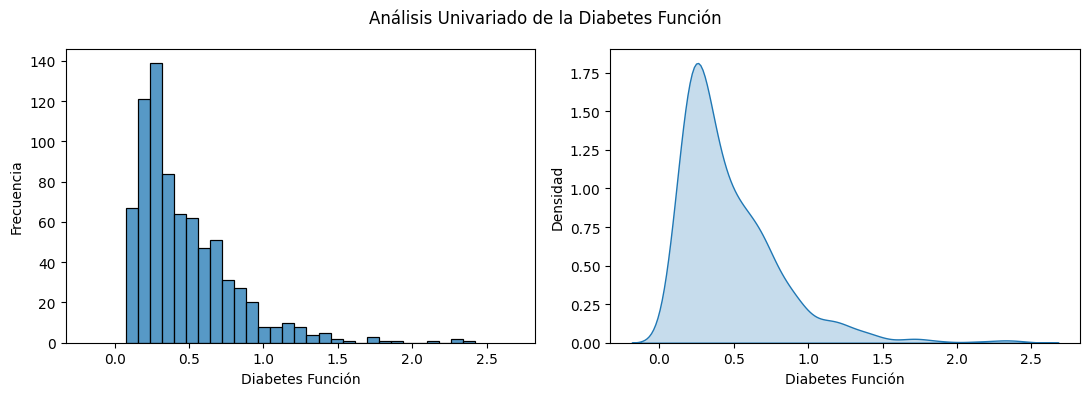

In [103]:
var = 'DiabetesPedigreeFunction'
var_title = 'Diabetes Función'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Age

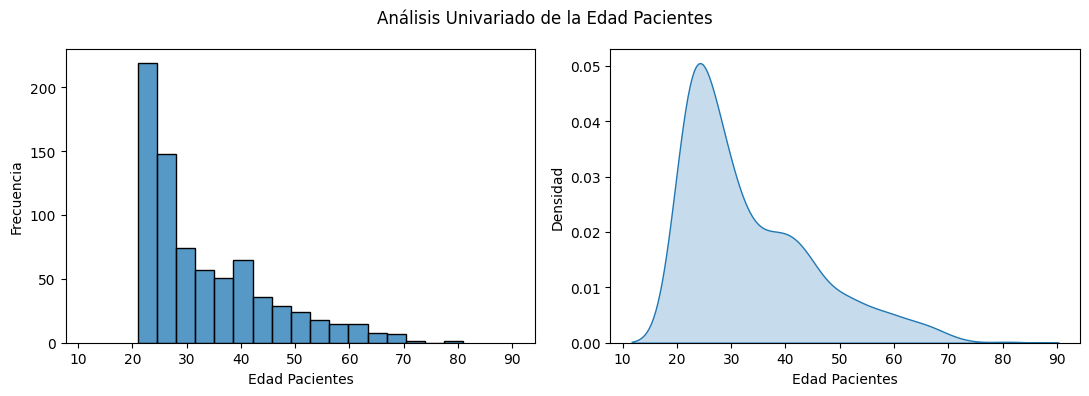

In [104]:
var = 'Age'
var_title = 'Edad Pacientes'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Analisis Multivariado

# Embarazo vs Caso Diabetes:

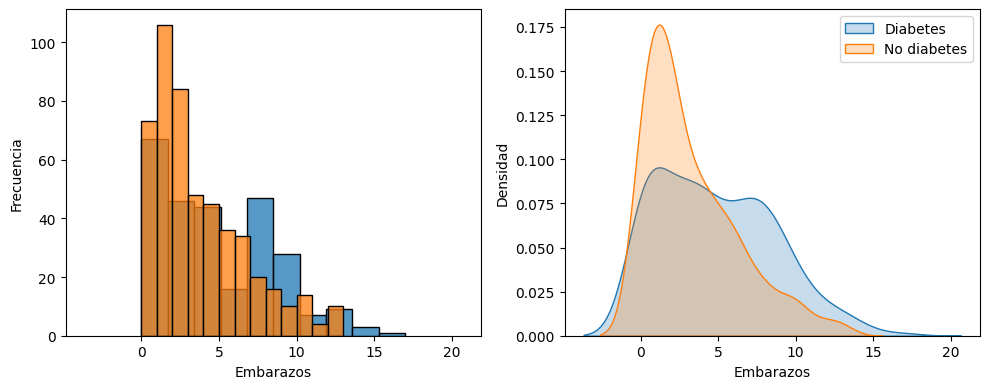

In [105]:
#Longitud del Sépalo vs Especies
var = 'Pregnancies'
var_title = 'Embarazos'

filter = df['Outcome'] == 1
df_diabetes = df.loc[filter]

filter = (df['Outcome'] == 0)
df_no_diabetes = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Diabetes", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="No diabetes", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Diabetes", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="No diabetes", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Glucose vs Caso Diabetes

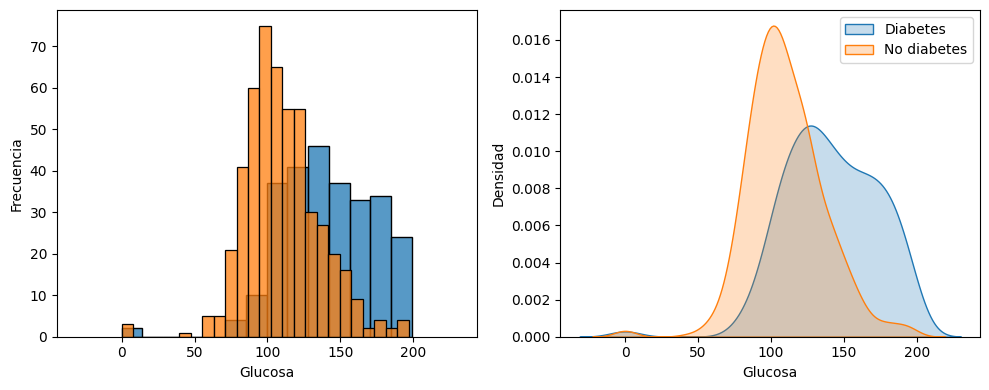

In [106]:
#Longitud del Sépalo vs Especies
var = 'Glucose'
var_title = 'Glucosa'

filter = df['Outcome'] == 1
df_diabetes = df.loc[filter]

filter = (df['Outcome'] == 0)
df_no_diabetes = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Diabetes", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="No diabetes", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Diabetes", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="No diabetes", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# BloodPressure vs Casos Diabetes

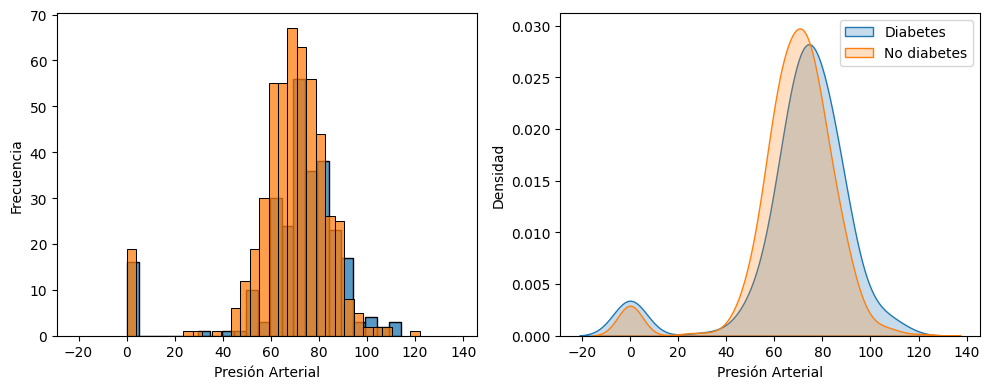

In [107]:
#Longitud del Sépalo vs Especies
var = 'BloodPressure'
var_title = 'Presión Arterial'

filter = df['Outcome'] == 1
df_diabetes = df.loc[filter]

filter = (df['Outcome'] == 0)
df_no_diabetes = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Diabetes", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="No diabetes", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Diabetes", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="No diabetes", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# SkinThickness

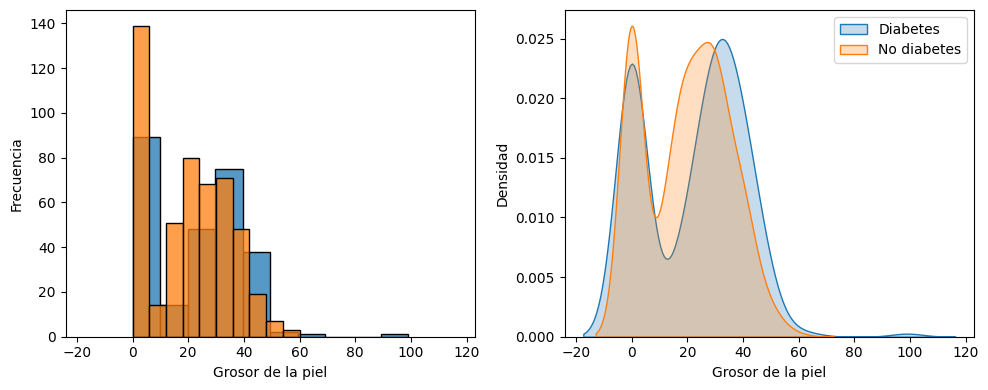

In [108]:
#Longitud del Sépalo vs Especies
var = 'SkinThickness'
var_title = 'Grosor de la piel'

filter = df['Outcome'] == 1
df_diabetes = df.loc[filter]

filter = (df['Outcome'] == 0)
df_no_diabetes = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Diabetes", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="No diabetes", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Diabetes", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="No diabetes", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Insulin

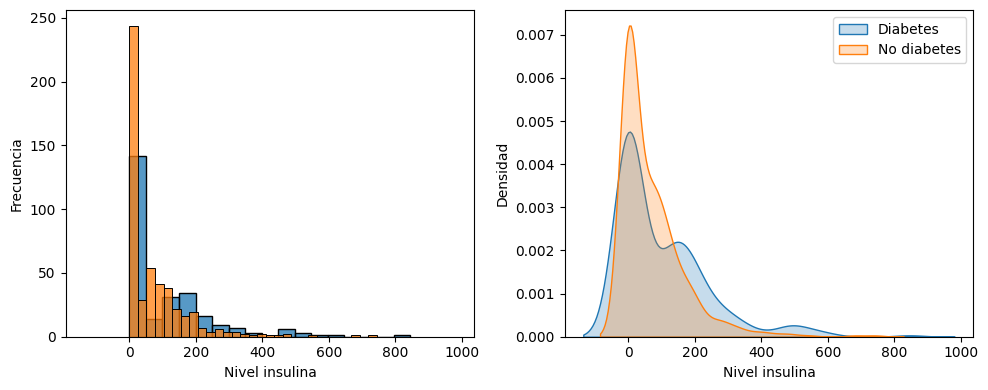

In [109]:
#Longitud del Sépalo vs Especies
var = 'Insulin'
var_title = 'Nivel insulina'

filter = df['Outcome'] == 1
df_diabetes = df.loc[filter]

filter = (df['Outcome'] == 0)
df_no_diabetes = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Diabetes", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="No diabetes", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Diabetes", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="No diabetes", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# BMI

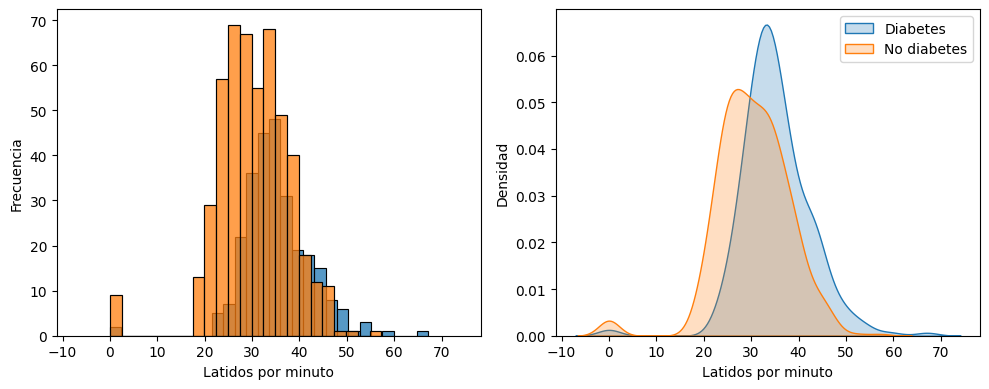

In [110]:
#Longitud del Sépalo vs Especies
var = 'BMI'
var_title = 'Latidos por minuto'

filter = df['Outcome'] == 1
df_diabetes = df.loc[filter]

filter = (df['Outcome'] == 0)
df_no_diabetes = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Diabetes", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="No diabetes", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Diabetes", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="No diabetes", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# DiabetesPedigreeFunction

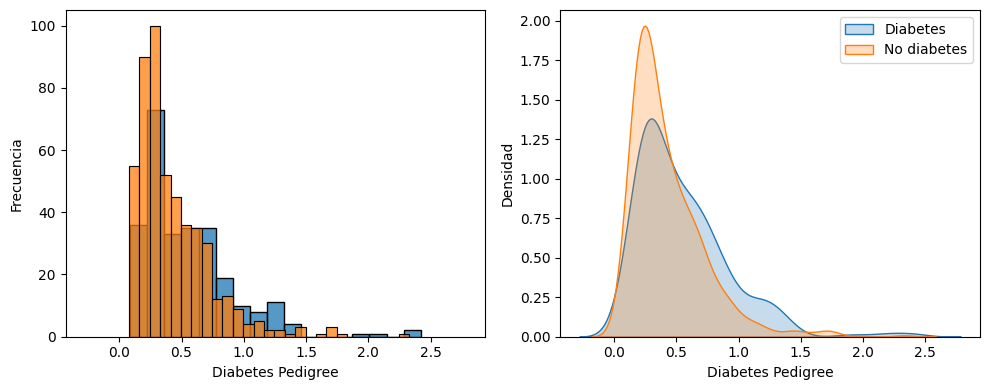

In [111]:
#Longitud del Sépalo vs Especies
var = 'DiabetesPedigreeFunction'
var_title = 'Diabetes Pedigree'

filter = df['Outcome'] == 1
df_diabetes = df.loc[filter]

filter = (df['Outcome'] == 0)
df_no_diabetes = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Diabetes", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="No diabetes", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Diabetes", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="No diabetes", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Age

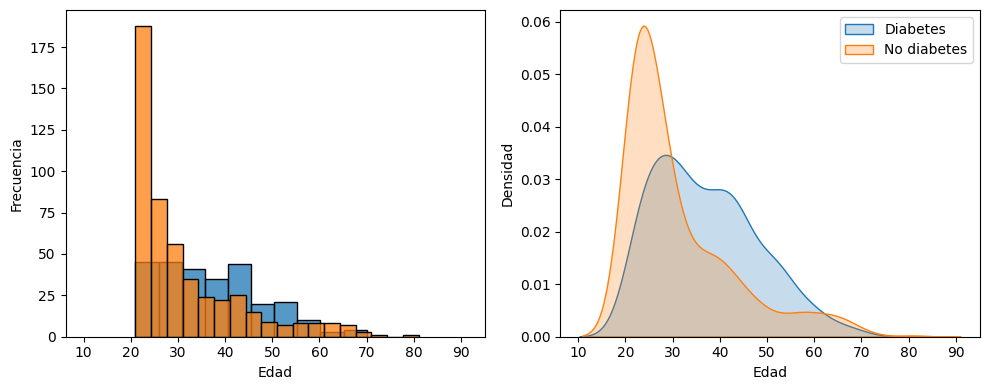

In [112]:
#Longitud del Sépalo vs Especies
var = 'Age'
var_title = 'Edad'

filter = df['Outcome'] == 1
df_diabetes = df.loc[filter]

filter = (df['Outcome'] == 0)
df_no_diabetes = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Diabetes", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="No diabetes", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Diabetes", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="No diabetes", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Embarazo vs DiabetesPedigreeFunction

<Axes: xlabel='Pregnancies', ylabel='DiabetesPedigreeFunction'>

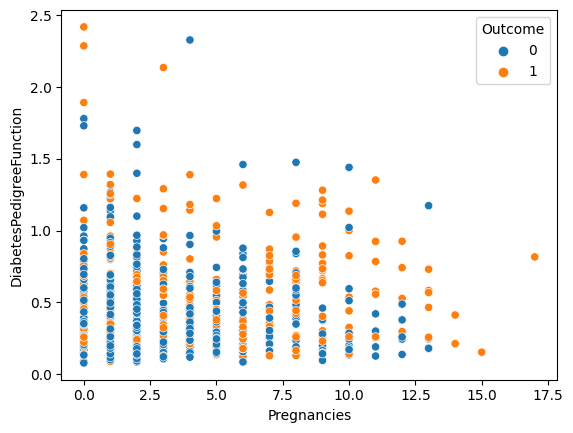

In [113]:
sns.scatterplot(data=df, x="Pregnancies", y="DiabetesPedigreeFunction", hue="Outcome")

In [114]:
# Embarazo vs Edad

<Axes: xlabel='Pregnancies', ylabel='Age'>

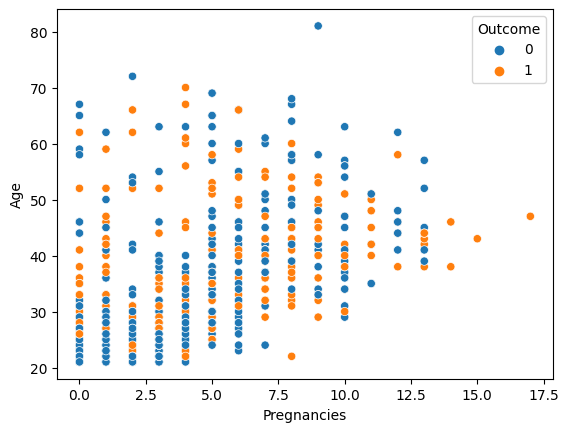

In [115]:
sns.scatterplot(data=df, x="Pregnancies", y="Age", hue="Outcome")

# Un gráfico en el que se puede ver todos los datos numéricos comparados con todos los datos numéricos

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


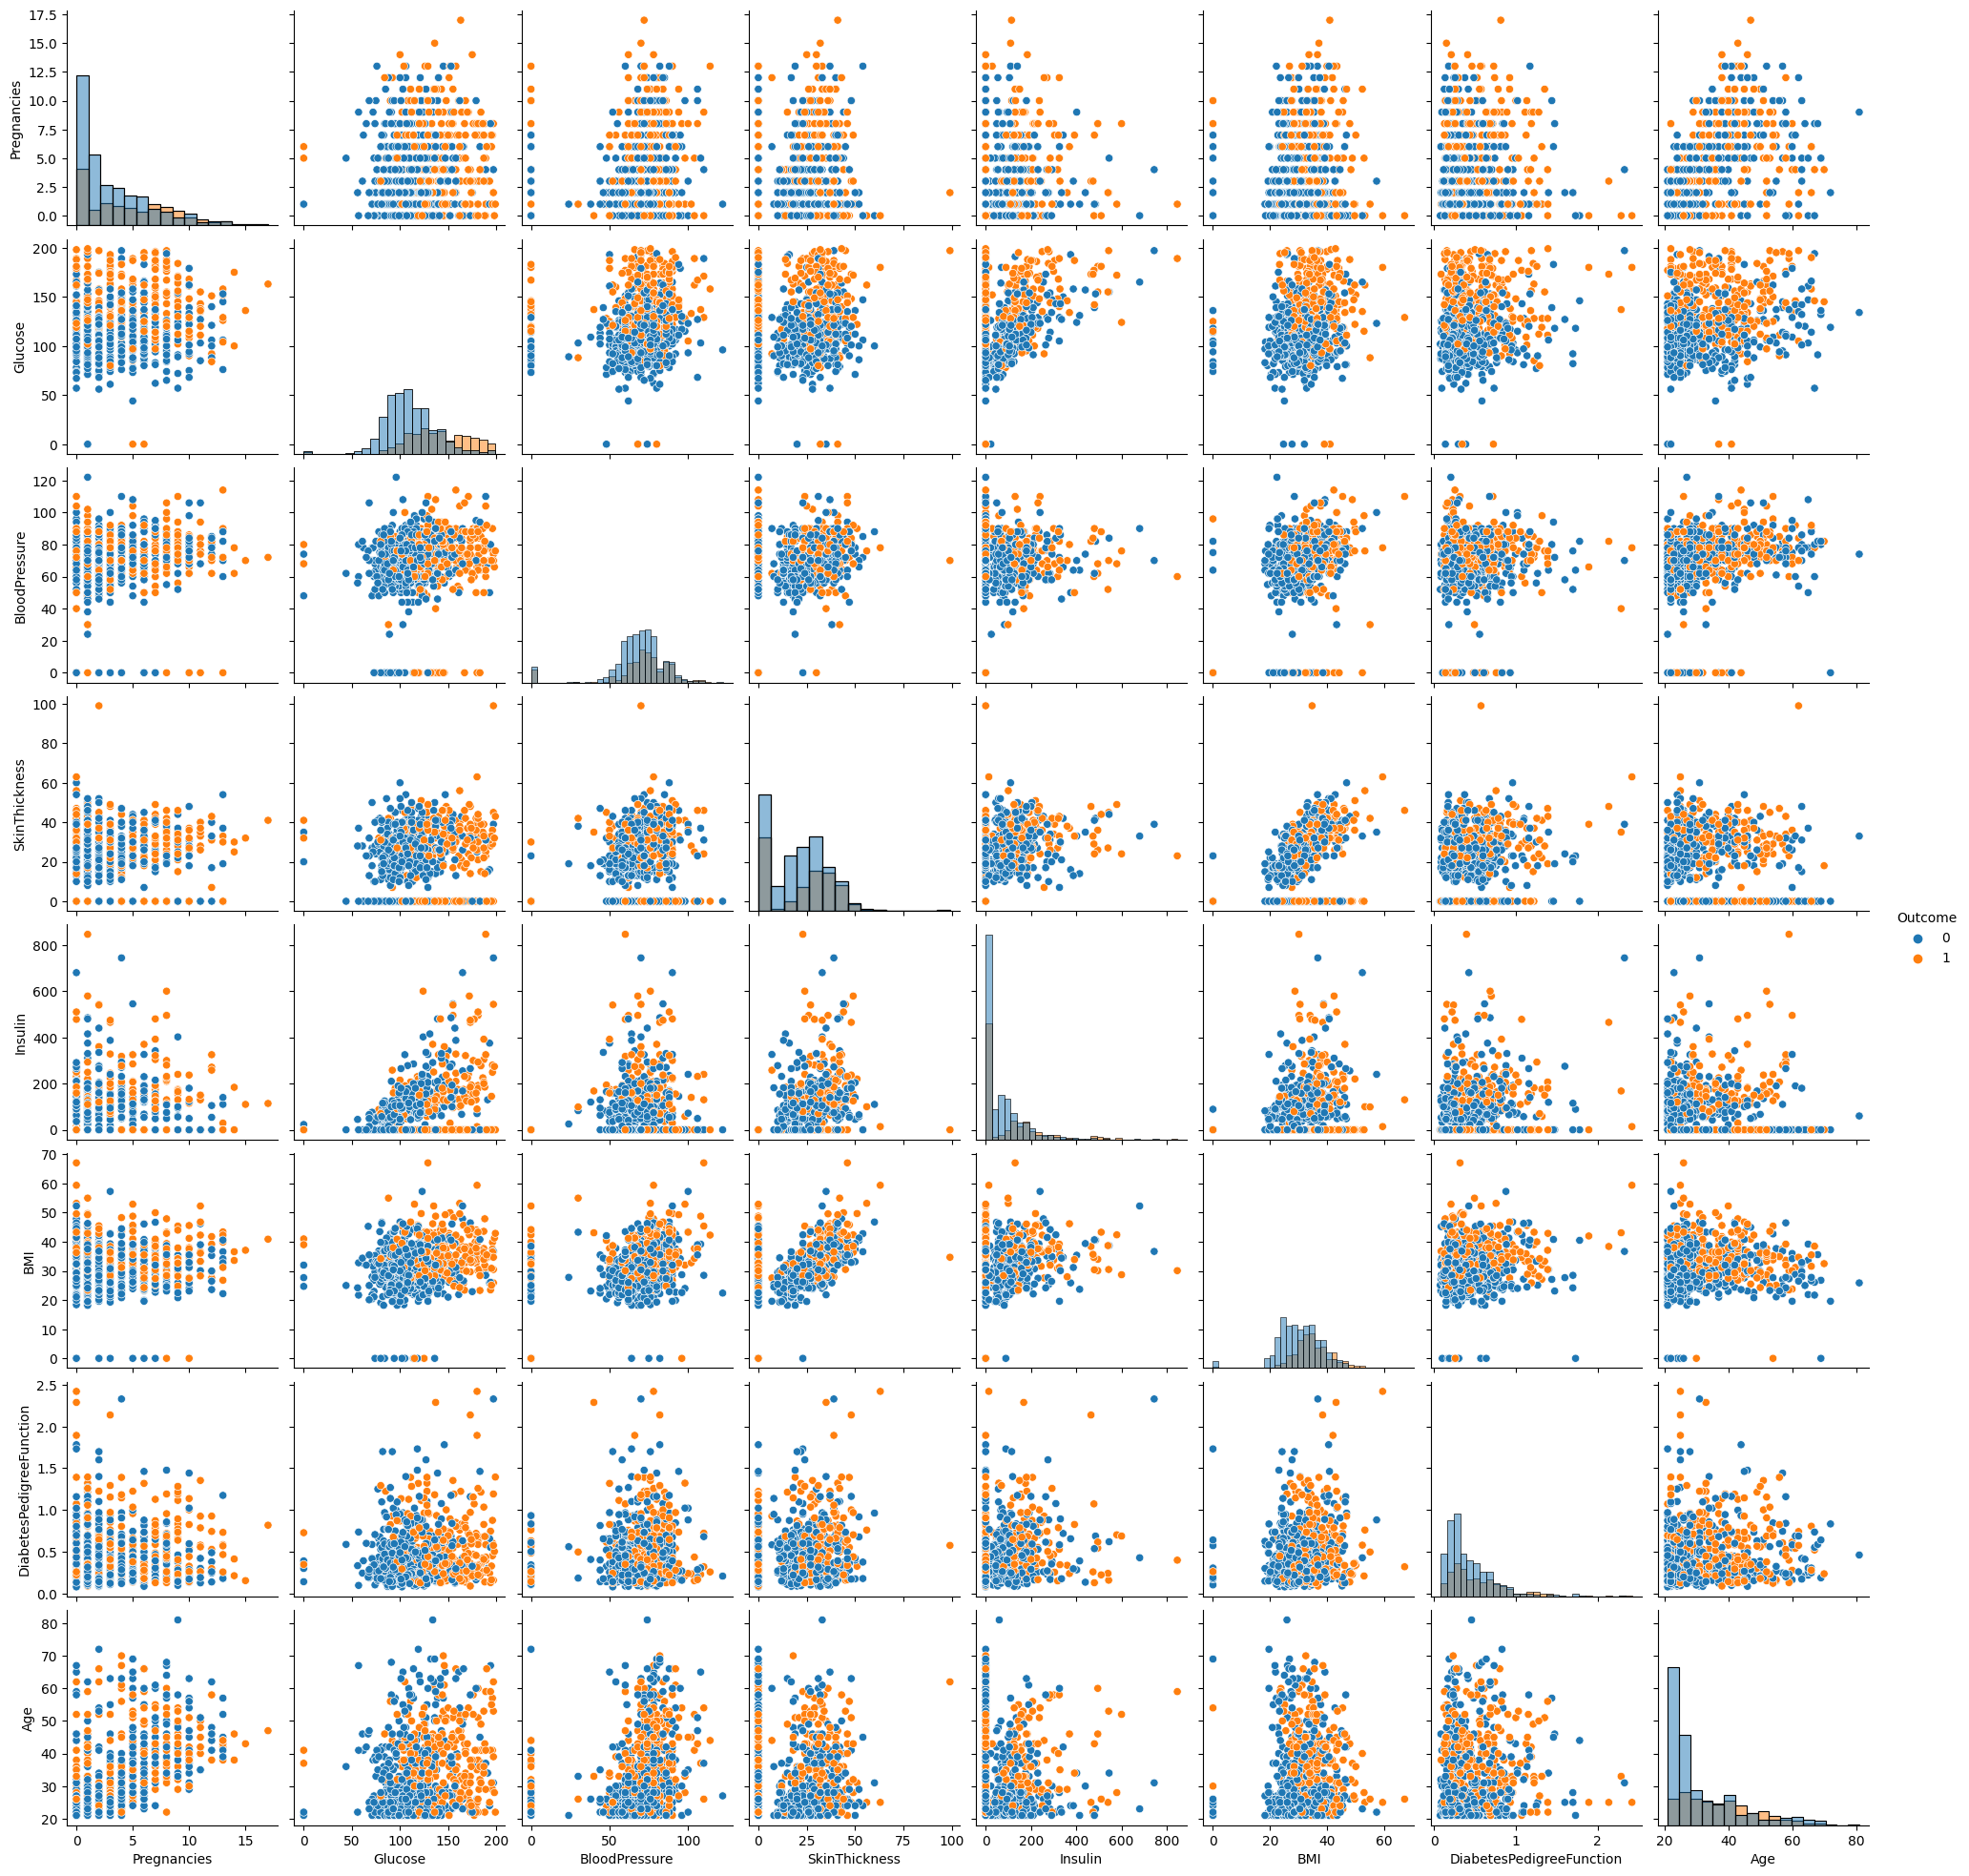

In [116]:
sns.pairplot(df, hue="Outcome", diag_kind="hist")

# Correlación entre variables

In [167]:
df_correlation = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
df_correlation.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


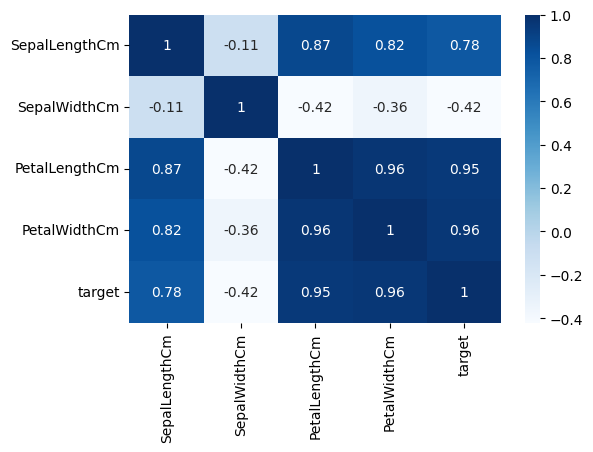

In [755]:
fig = plt.figure(figsize = (6,4))
sns.heatmap(df_correlation.corr(), cmap='Blues', annot=True);

In [762]:
# Dividir el conjunto de datos en entrenamiento y prueba
#['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
col_names = ['Insulin']
X = df[col_names]
#y = np.array(df['Outcome']).reshape(-1, 1)
y = df.Outcome
y = y.values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [763]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [764]:
print(regr.score(X_test, y_test))

0.013980579383868874


<Axes: xlabel='Pregnancies', ylabel='Age'>

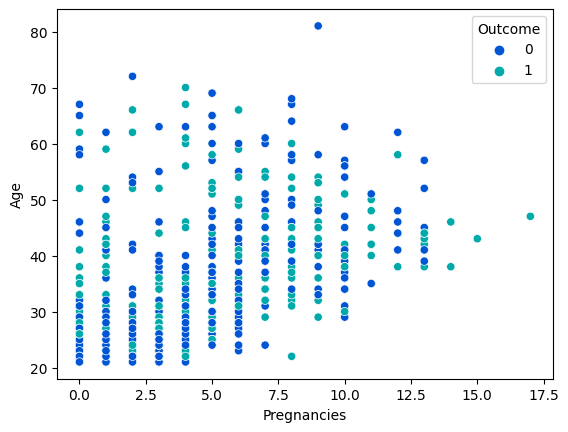

In [336]:
sns.scatterplot(data=df, x="Pregnancies", y="Age", hue="Outcome", palette = 'winter')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


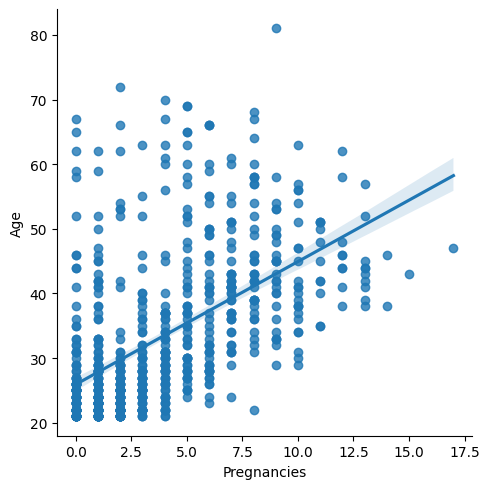

In [338]:
sns.lmplot(data = df,x ="Pregnancies", y ="Age")

# SALARY DATASET

In [745]:
#Cargar el dataset
dataset = pd.read_excel(os.environ['DATASETS_PATH']+'/salaries.xlsx')
dataset

,anosexperiencia,Salario
0,1.1,"39,343.00"
1,1.3,"46,205.00"
2,1.5,"37,731.00"
3,2.0,"43,525.00"
4,2.2,"39,891.00"
5,2.9,"56,642.00"
6,3.0,"60,150.00"
7,3.2,"54,445.00"
8,3.2,"64,445.00"
9,3.7,"57,189.00"


In [448]:
print(dataset.dtypes)
#df = df.apply(pd.to_numeric, errors='coerce')

anosexperiencia    float64
Salario             object
Salario_            object
Salario_int        float64
Salario_float      float64
dtype: object


In [486]:
#string to float
dataset['Salario_'] = dataset['Salario'].astype(str)
dataset['Salario'] = dataset['Salario_'].str.replace(',', '')
dataset['Salario_float'] = dataset['Salario'].astype(float)
print(dataset.dtypes)

anosexperiencia    float64
Salario             object
Salario_            object
Salario_int        float64
Salario_float      float64
dtype: object


In [524]:
df_correlation = dataset[['anosexperiencia','Salario_float']]
df_correlation.corr()

,anosexperiencia,Salario_float
anosexperiencia,1.000000,0.978242
Salario_float,0.978242,1.000000


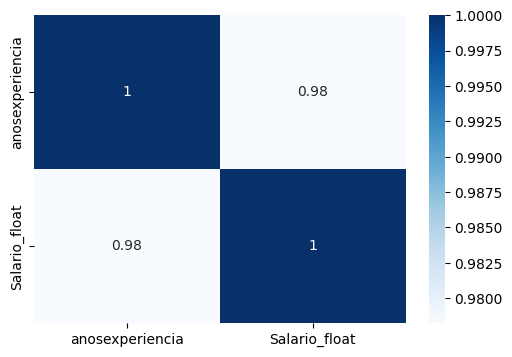

In [525]:
fig = plt.figure(figsize = (6,4))
sns.heatmap(df_correlation.corr(), cmap='Blues', annot=True);

In [689]:
dataset

,anosexperiencia,Salario,Salario_,Salario_int,Salario_float
0,1.1,39343.00,39343.00,39343.0,39343.0
1,1.3,46205.00,46205.00,46205.0,46205.0
2,1.5,37731.00,37731.00,37731.0,37731.0
3,2.0,43525.00,43525.00,43525.0,43525.0
4,2.2,39891.00,39891.00,39891.0,39891.0
5,2.9,56642.00,56642.00,56642.0,56642.0
6,3.0,60150.00,60150.00,60150.0,60150.0
7,3.2,54445.00,54445.00,54445.0,54445.0
8,3.2,64445.00,64445.00,64445.0,64445.0
9,3.7,57189.00,57189.00,57189.0,57189.0


In [692]:
col_names = ['anosexperiencia']
X = dataset[col_names].values.tolist()
y = dataset['Salario_float'].values.tolist()
#y = y.values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [704]:
y

[39343.0,
 46205.0,
 37731.0,
 43525.0,
 39891.0,
 56642.0,
 60150.0,
 54445.0,
 64445.0,
 57189.0,
 63218.0,
 55794.0,
 56957.0,
 57081.0,
 61111.0,
 67938.0,
 66029.0,
 83088.0,
 81363.0,
 93940.0,
 91738.0,
 98273.0,
 101302.0,
 113812.0,
 109431.0,
 105582.0,
 116969.0,
 112635.0,
 122391.0,
 121872.0]

In [705]:
regr = LinearRegression()
regr.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
print(regr.score(X_test, y_test))

0.9406504959895514


In [713]:
y_preds = regr.predict(X_test)

print(regr.score(X_test, y_preds))

1.0


In [714]:
y_preds

array([ 54493.02486432,  36275.00882438,  91887.89989367, 122570.87427672,
        62163.76846008,  51616.49601591, 102435.17233784, 124488.56017566,
        89011.37104525])

In [715]:
X_test

[[3.2], [1.3], [7.1], [10.3], [4.0], [2.9], [8.2], [10.5], [6.8]]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


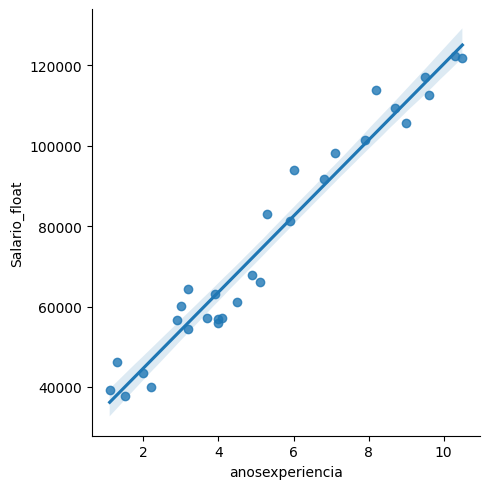

In [717]:
sns.lmplot(data = dataset,x ="anosexperiencia", y ="Salario_float")

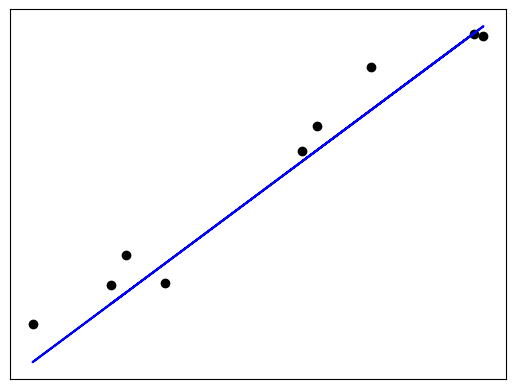

In [718]:
# plotea los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_preds, color='blue')
plt.xticks(())
plt.yticks(())
plt.show()